# Time-series Analysis of Point Production for Draft Eligible Players

The following project will be an attempt at viewing the relationship between late season point production and draft position.

## Load Data

In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [410]:
Slaf = pd.read_csv('Slafkovsky_Gamelogs.csv')
Slaf

,Date,League,Team,Opponent,Result,G,A,TP,PIM,+/-,SOG,PPG,SHG,TOI
0,2022-05-26T20:20:00+0300,WC,Slovakia,@ Finland,L 2-4,0,0,0,0,-1,4,0,0,20:22
1,2022-05-24T16:20:00+0300,WC,Slovakia,vs Denmark,W 7-1,1,1,2,0,3,6,0,0,19:58
2,2022-05-21T20:20:00+0300,WC,Slovakia,@ Italy,W 3-1,0,2,2,2,2,2,0,0,21:57
3,2022-05-20T20:20:00+0300,WC,Slovakia,@ Kazakhstan,W 4-3,1,1,2,0,0,4,0,0,23:14
4,2022-05-18T20:20:00+0300,WC,Slovakia,@ Switzerland,L 3-5,1,0,1,0,-1,3,0,0,19:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2021-09-18T18:30:00+0300,Liiga,TPS,vs Lukko,W 1-0,0,1,1,2,1,4,0,0,19:52
73,2021-09-17T18:30:00+0300,Liiga,TPS,@ Pelicans,L 0-1,0,0,0,0,0,5,0,0,19:58
74,2021-09-15T18:30:00+0300,Liiga,TPS,@ JYP,W 2-1,0,0,0,0,0,2,0,0,16:25
75,2021-09-11T12:30:00+0300,U20 SM-sarja,TPS U20,vs KooKoo U20,W 3-1,0,0,0,0,0,11,0,0,20:46


In [411]:
# List comprehension to strip string after Year, month and date

lst = []

for i in Slaf['Date']:
    lst.append(i[:10])

In [412]:
# Replace Date column with lst

Slaf['Date'] = lst

In [413]:
# Set up Moving Average Timeseries df with dates and points

Slaf = Slaf.sort_values('Date', ascending=True)
Slaf = Slaf[['Date', 'TP', 'League']]

In [414]:
Slaf['League'] = Slaf['League'].str.lstrip()
Slaf

,Date,TP,League
76,2021-09-10,2,U20 SM-sarja
75,2021-09-11,0,U20 SM-sarja
74,2021-09-15,0,Liiga
73,2021-09-17,0,Liiga
72,2021-09-18,1,Liiga
...,...,...,...
4,2022-05-18,1,WC
3,2022-05-20,2,WC
2,2022-05-21,2,WC
1,2022-05-24,2,WC


In [415]:
# Create list of conditions

conditions = [
    Slaf['League'] == 'U20 SM-sarja',
    Slaf['League'] == 'Liiga',
]

# Create list of values

values = [0.083, 0.441]

# Create new column using np.select to assign values to the conditions

Slaf['NHLe Coefficient'] = np.select(conditions, values)

Slaf.head()

,Date,TP,League,NHLe Coefficient
76,2021-09-10,2,U20 SM-sarja,0.083
75,2021-09-11,0,U20 SM-sarja,0.083
74,2021-09-15,0,Liiga,0.441
73,2021-09-17,0,Liiga,0.441
72,2021-09-18,1,Liiga,0.441


In [416]:
# Create NHLe column

Slaf['NHLe'] = Slaf['TP']*Slaf['NHLe Coefficient']
Slaf.head()

,Date,TP,League,NHLe Coefficient,NHLe
76,2021-09-10,2,U20 SM-sarja,0.083,0.166
75,2021-09-11,0,U20 SM-sarja,0.083,0.000
74,2021-09-15,0,Liiga,0.441,0.000
73,2021-09-17,0,Liiga,0.441,0.000
72,2021-09-18,1,Liiga,0.441,0.441


In [417]:
Slaf_NHLe = Slaf[['Date', 'NHLe']]

In [418]:
Slaf_NHLe['NHLe'] = Slaf_NHLe['NHLe'].cumsum()

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_42895/2474476192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Slaf_NHLe['NHLe'] = Slaf_NHLe['NHLe'].cumsum()


In [419]:
Slaf_NHLe.reset_index(inplace=True)
Slaf_NHLe.drop(['index'], axis=1, inplace=True)

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_42895/935151751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Slaf_NHLe.drop(['index'], axis=1, inplace=True)


In [420]:
Slaf_NHLe

,Date,NHLe
0,2021-09-10,0.166
1,2021-09-11,0.166
2,2021-09-15,0.166
3,2021-09-17,0.166
4,2021-09-18,0.607
...,...,...
72,2022-05-18,8.908
73,2022-05-20,8.908
74,2022-05-21,8.908
75,2022-05-24,8.908


Text(0, 0.5, 'Sum of Total Points')

<Figure size 640x480 with 0 Axes>

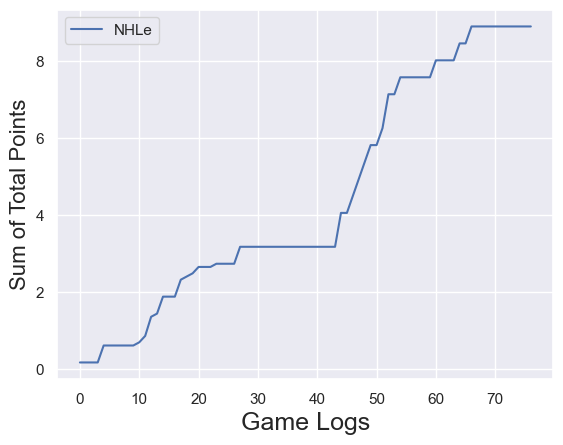

In [421]:
# Plot the timeseries

fig = plt.figure()
Slaf_NHLe.plot()
fig.suptitle('Cumulative Points Scored', fontsize=20)
plt.xlabel('Game Logs', fontsize=18)
plt.ylabel('Sum of Total Points', fontsize=16)

### Get a Rolling Average view

In [422]:
# Tail-rolling average transform
rolling = Slaf_NHLe.rolling(window=5)
rolling_mean = rolling.mean()

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_42895/2773159901.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolling_mean = rolling.mean()


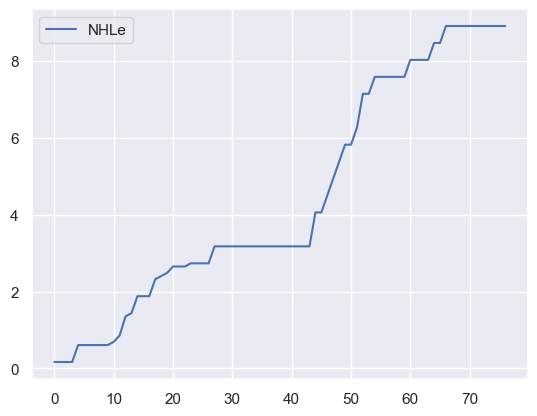

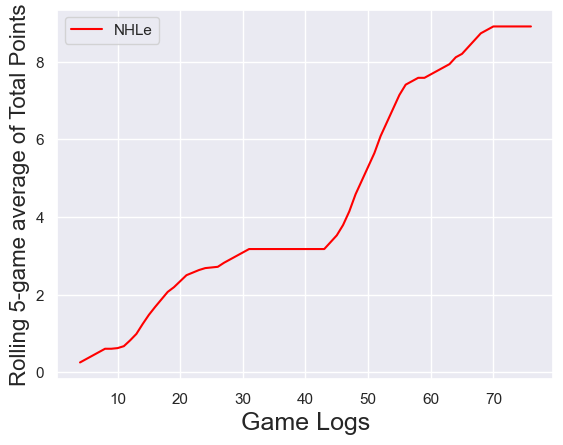

<Figure size 640x480 with 0 Axes>

In [423]:
# plot original and transformed dataset
Slaf_NHLe.plot()
rolling_mean.plot(color='red')
fig.suptitle('Cumulative Points Scored', fontsize=20)
plt.xlabel('Game Logs', fontsize=18)
plt.ylabel('Rolling 5-game average of Total Points', fontsize=16)
plt.show()
plt.tight_layout()

## Shane Wright Timeseries Gamelogs

In [424]:
Wright = pd.read_csv('Wright_Gamelogs.csv')
Wright

,Date,League,Team,Opponent,Result,G,A,TP,PIM,+/-,SOG,PPG,SHG,Unnamed: 13
0,2022-05-14T19:00:00-0400,OHL,Kingston Frontenacs,@ North Bay Battalion,L 5-6,1,0,1,0,0,3,1,0,NaN
1,2022-05-12T19:00:00-0400,OHL,Kingston Frontenacs,vs North Bay Battalion,L 3-4,0,1,1,0,0,5,0,0,NaN
2,2022-05-10T19:00:00-0400,OHL,Kingston Frontenacs,vs North Bay Battalion,L 3-6,0,2,2,0,0,3,0,0,NaN
3,2022-05-08T14:00:00-0400,OHL,Kingston Frontenacs,@ North Bay Battalion,W 5-4 (OT),0,1,1,0,2,3,0,0,NaN
4,2022-05-06T19:00:00-0400,OHL,Kingston Frontenacs,@ North Bay Battalion,L 4-6,0,1,1,0,0,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2021-10-16T19:05:00-0400,OHL,Kingston Frontenacs,@ Peterborough Petes,W 3-1,0,0,0,0,0,4,0,0,NaN
72,2021-10-15T19:00:00-0400,OHL,Kingston Frontenacs,vs Sudbury Wolves,W 5-4,0,2,2,0,1,2,0,0,NaN
73,2021-10-10T14:00:00-0400,OHL,Kingston Frontenacs,@ Ottawa 67's,L 2-3,1,0,1,0,1,4,0,0,NaN
74,2021-10-09T19:00:00-0400,OHL,Kingston Frontenacs,vs Mississauga Steelheads,L 2-7,0,0,0,0,-1,2,0,0,NaN


In [425]:
# List comprehension to strip string after Year, month and date

lst1 = []

for i in Wright['Date']:
    lst1.append(i[:10])

In [426]:
# Replace Date column with lst

Wright['Date'] = lst1

In [427]:
Wright = Wright[['Date', 'TP', 'League']]
Wright = Wright.sort_values('Date', ascending=True)

In [428]:
# Create list of conditions

conditions = [
    Wright['League'] == 'OHL',
]

# Create list of values

values = [0.144]

# Create new column using np.select to assign values to the conditions

Wright['NHLe Coefficient'] = np.select(conditions, values)

Wright.head()

,Date,TP,League,NHLe Coefficient
75,2021-10-08,3,OHL,0.144
74,2021-10-09,0,OHL,0.144
73,2021-10-10,1,OHL,0.144
72,2021-10-15,2,OHL,0.144
71,2021-10-16,0,OHL,0.144


In [429]:
# Create NHLe column

Wright['NHLe'] = Wright['TP']*Wright['NHLe Coefficient']
Wright.head()

,Date,TP,League,NHLe Coefficient,NHLe
75,2021-10-08,3,OHL,0.144,0.432
74,2021-10-09,0,OHL,0.144,0.000
73,2021-10-10,1,OHL,0.144,0.144
72,2021-10-15,2,OHL,0.144,0.288
71,2021-10-16,0,OHL,0.144,0.000


In [430]:
Wright_NHLe = Wright[['Date', 'NHLe']]
Wright_NHLe['NHLe'] = Wright_NHLe['NHLe'].cumsum()
Wright_NHLe.head()

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_42895/2659253293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wright_NHLe['NHLe'] = Wright_NHLe['NHLe'].cumsum()


,Date,NHLe
75,2021-10-08,0.432
74,2021-10-09,0.432
73,2021-10-10,0.576
72,2021-10-15,0.864
71,2021-10-16,0.864


In [431]:
Wright_NHLe.reset_index(inplace=True)
Wright_NHLe.drop(['index'], axis=1, inplace=True)

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_42895/2327758796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wright_NHLe.drop(['index'], axis=1, inplace=True)


Text(0, 0.5, 'Sum of Total Points')

<Figure size 640x480 with 0 Axes>

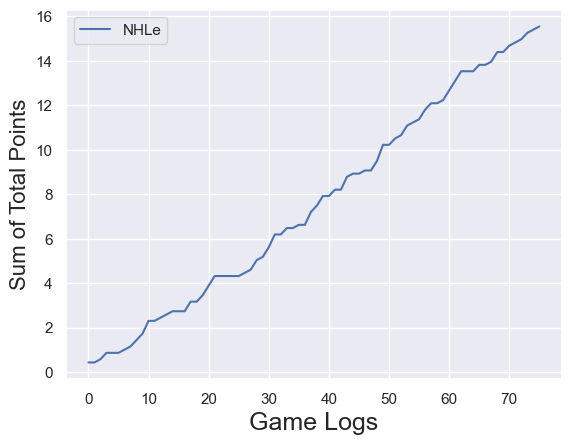

In [432]:
# Plot the timeseries

fig = plt.figure()
Wright_NHLe.plot()
fig.suptitle('Cumulative Points Scored', fontsize=20)
plt.xlabel('Game Logs', fontsize=18)
plt.ylabel('Sum of Total Points', fontsize=16)

### Rolling-average

In [433]:
# Tail-rolling average transform
rolling1 = Wright_NHLe.rolling(window=5)
rolling_mean1 = rolling1.mean()

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_42895/2534763479.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolling_mean1 = rolling1.mean()


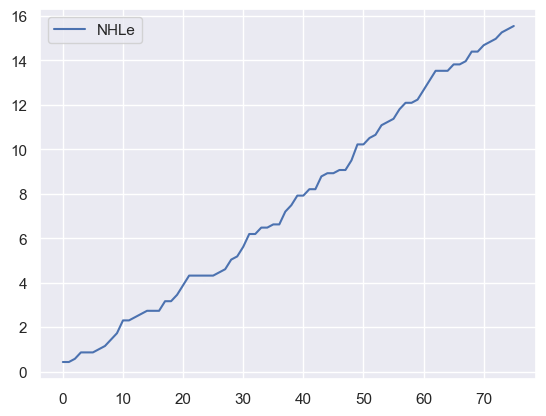

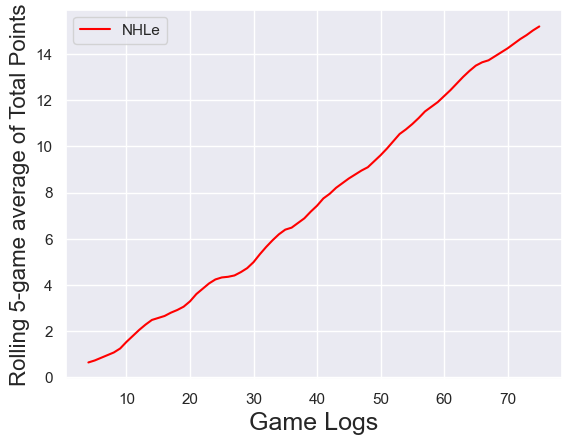

<Figure size 640x480 with 0 Axes>

In [434]:
# plot original and transformed dataset
Wright_NHLe.plot()
rolling_mean1.plot(color='red')
fig.suptitle('Cumulative Points Scored', fontsize=20)
plt.xlabel('Game Logs', fontsize=18)
plt.ylabel('Rolling 5-game average of Total Points', fontsize=16)
plt.show()
plt.tight_layout()

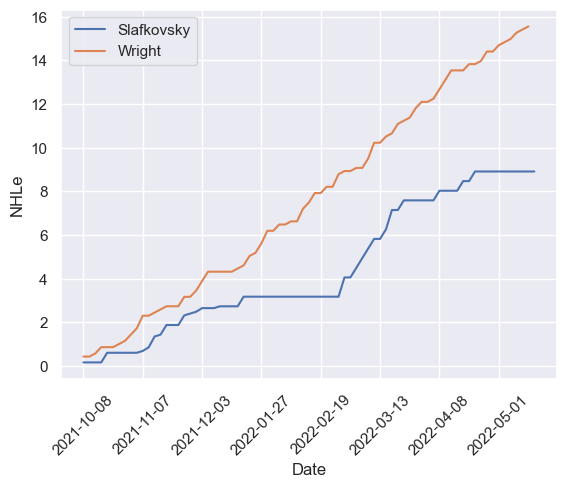

In [451]:
firstPlot = Slaf_NHLe.plot(x='Date', y='NHLe') # where the 'Date' is the column with date.

secondPlot = Wright_NHLe.plot(x='Date', y='NHLe', ax=firstPlot)

plt.legend(('Slafkovsky', 'Wright'))
plt.xticks(rotation=45)
plt.ylabel('NHLe')

plt.show()